1. Scatter plot. Inspection with I/O.
2. Relation between the two variables
    * correletaion/anti-correlation
    * uncorrelation
      
    * 2 coeficients
       ** Pearson -> r²-> linearity
       ** Spearman -> monotonicity

       be careful with the coefficients
3. If we see some relation, we propose a physically motivated model! It always has a variable, free parameters (coefficients).
4. Refression is a set of methods to constranint the free parameters in the physics motivated model, so that this represents the data we have.

It is common to overfit the data, this means to add unnecessary free parameters to carry out the regression. This will yield an smaller error but when doing the extrapolation (extend the model to new data) it will not match it.

The model should have as many free parameters as necessary, no more.

In [2]:
# Import usual libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.optimize as opt

In [3]:
# We use Pandas.DF

df = pd.read_csv("./data/books.dat", sep = "\s+")

print(df)

# Get data into arrays
pages = np.array(df["Pages"]) # in units of pages
thick = np.array(df["Thickness"]) # in units of mm

#print(pages)
#print(thick)

FileNotFoundError: [Errno 2] No such file or directory: './data/books.dat'

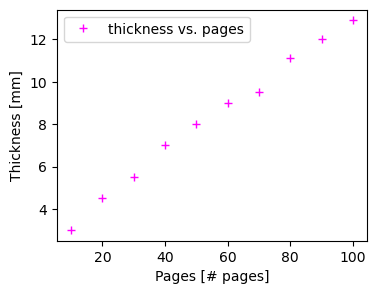

In [5]:
# Figure environment
plt.figure(figsize = (4,3))

plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

## Coefficients

In [8]:
# Let's calculate these coefficients

# 1. Spearman coefficient
sp = st.spearmanr(pages, thick)

# 2. Pearson coefficient
pe = st.pearsonr(pages, thick)

print("Spearman:\n", sp)

print("Pearson:\n", pe) #the pvalues are the leftovers, the probability of the expected distributions just being by chance. These values are on the 
# outskirts of the distribution

Spearman:
 SignificanceResult(statistic=np.float64(0.9999999999999999), pvalue=np.float64(6.646897422032013e-64))
Pearson:
 PearsonRResult(statistic=np.float64(0.9967647822032424), pvalue=np.float64(4.774249416992816e-10))


In [1]:
# Get coeffcients - best fit parameters (LM method)

m, b = np.polyfit(pages, thick, 1) #degree of the polynomial is the last input
#polyfit just works for polynomial functionals

NameError: name 'np' is not defined

In [11]:

# Print to check

print('slope =', m, ' intercept=', b)

slope = 0.10793939393939396  intercept= 2.3133333333333312


In [12]:
# Get fitting function

fit_thick = m*pages + b

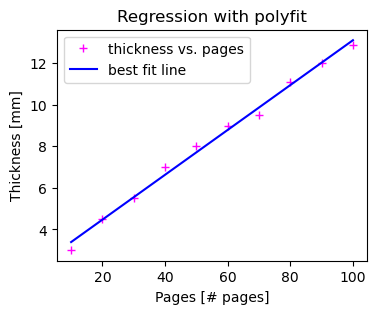

In [13]:
# replot  the data with the fit

# Figure environment
plt.figure(figsize = (4,3))

plt.title("Regression with polyfit")
plt.plot(pages, thick, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(pages, fit_thick, color = "blue",\
        linestyle = "-", label = "best fit line")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

## Uncertainties and level of confidence
Of the Gaussian distribution, the pvalues are outside my interval of confidence. 
* Gaussians distributions gives us symmetric uncertainties.
* What about other distributions? $\sigma_1$ and $\sigma_2$ are not symmetric anymore. We need to do some normality test on the data to check this.

In [5]:
# Use pandas to open the file and place the data into a DF

df_freefall = pd.read_csv("/home/prostofsound/jnotebooks/COMP I/Notes/data/data_freefall.csv", sep = ",")

print(df_freefall)

    Time (s)  Position (m)
0        0.0           0.0
1        0.5           2.0
2        1.0           5.2
3        1.5           9.8
4        2.0          19.7
5        2.5          31.2
6        3.0          44.4
7        3.5          57.8
8        4.0          80.8
9        4.5         100.4
10       5.0         121.1


In [6]:
# Place the data into numpy arrays

time = np.array(df_freefall["Time (s)"])
ypos = np.array(df_freefall["Position (m)"])

print(ypos, time)

[  0.    2.    5.2   9.8  19.7  31.2  44.4  57.8  80.8 100.4 121.1] [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


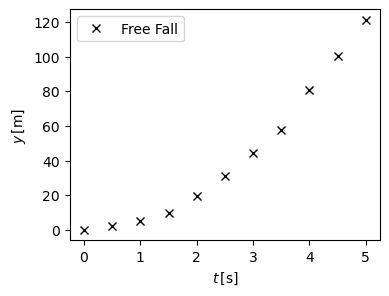

In [8]:
# Fig env:

plt.figure(figsize=(4,3))

plt.plot(time, ypos, color = "black", marker = "x", linestyle = " ", label = "Free Fall") #without linestyle

plt.xlabel(r"$t\,\rm [s]$")
plt.ylabel(r"$y\,\rm [m]$")

plt.legend()

plt.show()

In [9]:
#Repeat the experiment many more times, central limit theorem to make the uncertainties smaller when averaging all the experiments.

## Excercise: Radio-Astronomy
Spectral lines
* Information on composition of gases or material, thanks to quantum mechanics (the transitions inside an atom are discrete).
* Spectroscopy (x-ray, double-slit)
  * Laboratory: Material sciences, nanotechnology
  * Space/Atmosphere: Astronomy, climate, space sciences.

Types of spectral lines
* Emission lines: Gas material gets excited (thermal, increase of collisions, x-ray/UV ionization and with incident photons). We always find noise (base line) on the graph from the spectrograph (Intensity vs wavelength or Intensity vs wavenumber or Intesity vs wavefrequency) and bumps for distinct wavelengths associated with the chemical composition of the gas.
* Absorption lines: There has to be a background source (for example $quasars$ in space). If we have just the source, we have kind of a constant intensity for the different wavelengths. If a gas material is placed in front, the gas is going to absorb specific wavelengths according to the compostion and we see characteristic gaps in the intensity for specific wavelengths.

If two gasses have the same spectral line but with different width, this could tell different physical processes: higher thermal turbulance. We can understand the internal motion of the gas.

For hydrogen, when the hydrogen goes from parallel configuration to antiparallel configuration (spin states of the proton and the electron, which is related with the quantum numbers s,m) we have a hyperfine emission line, at 21 cm in wavelength (radio frequencies) in the neutral hydrogen atom. We cannot detect this transition on Earth since the rate at with it occurs is very small, is a highly forbidden transition. In space, 10 million years is nothing and hydrogen is everywhere.

In [7]:
#Cat the file before importing.
# Let's place the data into a pandas DF

h1_df = pd.read_csv("/home/prostofsound/jnotebooks/COMP I/Notes/data/104444.9-264831_gass_spectrum.txt"\
                   , sep = "\s+")

print(h1_df)

       velocity        Tb
0   -494.424011 -0.004997
1   -490.500011  0.010002
2   -486.576011  0.017502
3   -482.652011  0.027504
4   -478.728011 -0.014999
..          ...       ...
248  478.727995  0.002502
249  482.651995 -0.012497
250  486.575995  0.007500
251  490.499995 -0.017502
252  494.423995 -0.044998

[253 rows x 2 columns]


Velocity is associated with frequency, it is easier to work with velocities units. Tb is the antenna temperature (how many radiation is received at a particular velocity per surface per frequency).

In [8]:
# Place the data columsn into arrays

h1_vel = np.array(h1_df["velocity"])
h1_int = np.array(h1_df["Tb"])

#print(h1_int)

## Data inspection

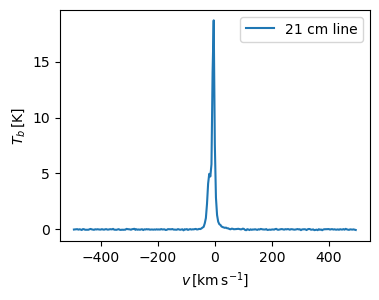

In [12]:
# Plotting: figure environment

plt.figure(figsize=(4,3))

plt.plot(h1_vel, h1_int, label = "21 cm line")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.show()

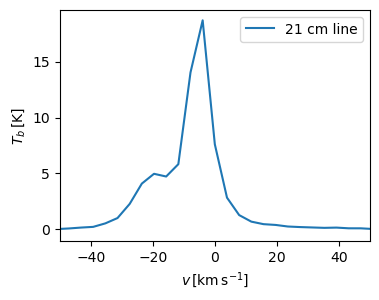

In [14]:
#Zoom in, since the interesting part in around -50 to 50 km/s
# Plotting: figure environment

plt.figure(figsize=(4,3))

plt.plot(h1_vel, h1_int, label = "21 cm line")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

We have two bumps, at around o (km/s) and -20 (km/s). 0 (km/s) means the gas is static respect to us and -20 (km/s) it is moving towards us. Why?

We may be seeing two gasses in the same line of sight of the telescope. Two because the internal gas clouds have different velocities. Also, we could be seeing two entities on the same region.

## A: First attempt: Regression model (1 Gaussian - bad model)

In [16]:
# Function for the Gaussian

def one_gaussian(x, a, b, c):
    """
    This defnes a 1-Gaussian model for the regression.
    This may not be the best model because we see 2 components.
    Inputs: x-> velocity vector, a in the height of the Gaussian (the normalization factor),
            b-> is the width, c -> displacement
    Output: y -> 1D 1-Gaussian model
    """
    
    # 1D Gaussian
    y = a*np.exp(-b*(x + c)**2)
    
    return y

In [18]:
# Regression with curve_fit

coef, cova = opt.curve_fit(one_gaussian, h1_vel, h1_int)

print("Best-fit values are:\n", coef)

print("The covariance matrix is:\n", cova) #cova has the sigmas associated with the errors

Best-fit values are:
 [17.28888354  0.02146926  5.34294188]
The covariance matrix is:
 [[1.85376741e-01 3.06952787e-04 1.99827445e-06]
 [3.06952787e-04 1.52459491e-06 9.26003890e-09]
 [1.99827445e-06 9.26003890e-09 1.92585522e-02]]


/tmp/ipykernel_4897/2292147822.py:13: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*(x + c)**2)


In [19]:
# Calculate uncertainties
unc_param = np.sqrt(np.diag(cova))

print("The associated uncertainties are:\n", unc_param)

The associated uncertainties are:
 [0.43055399 0.00123474 0.13877519]


In [22]:
# Evaluate our models using the best-fit params
h1_int_fit = one_gaussian(h1_vel, *coef)

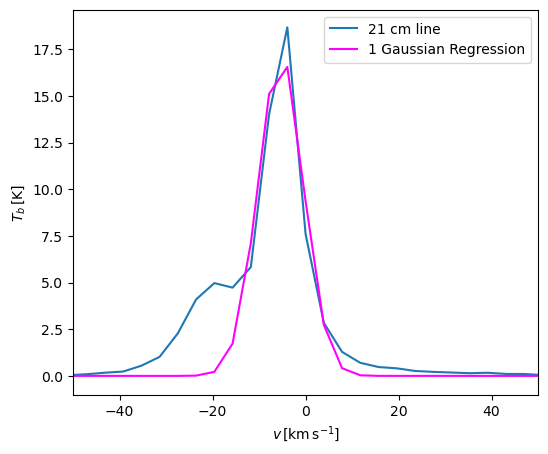

In [21]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# Regression
plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")

plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

## B: First attempt: Regression model (2 Gaussian - good model)

In [23]:
# Function for the Gaussian

def two_gaussian(x, a, b, c, d, e, f):
    """
    This defines a 2-Gaussian model for the regression.
    This may be a good model because we see 2 components.
    Inputs: x-> velocity vector, a,d are the heights of the
            Gaussians,
            b, e-> are the widths,
            c, f -> are the displacements
    Output: y -> 1D 2-Gaussian model
    """
    
    # 2D Gaussians
    y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2)
    
    return y

In [24]:
# Regression with curve_fit

coef2, cova2 = opt.curve_fit(two_gaussian, h1_vel, h1_int)

print("Best-fit values are:\n", coef2)

print("The covariance matrix is:\n", cova2)

Best-fit values are:
 [5.34482387e+00 3.33574734e-03 1.19767713e+01 1.50333004e+01
 5.59263624e-02 4.76060157e+00]
The covariance matrix is:
 [[ 5.92439583e-03  3.09870554e-06 -7.00843690e-03 -4.82950352e-03
   4.56181789e-05 -2.67950783e-04]
 [ 3.09870554e-06  5.70147930e-09 -1.10251360e-06 -1.56363150e-06
   6.90182110e-09 -5.93345325e-07]
 [-7.00843690e-03 -1.10251360e-06  3.33737260e-02  1.04166309e-02
  -1.02060218e-04 -8.21530425e-04]
 [-4.82950352e-03 -1.56363150e-06  1.04166309e-02  1.43333876e-02
  -2.35126795e-06  1.77882647e-04]
 [ 4.56181789e-05  6.90182110e-09 -1.02060218e-04 -2.35126795e-06
   1.16529162e-06  3.83557405e-06]
 [-2.67950783e-04 -5.93345325e-07 -8.21530425e-04  1.77882647e-04
   3.83557405e-06  6.22389861e-04]]


/tmp/ipykernel_4897/227499923.py:15: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(-b*(x + c)**2) + d*np.exp(-e*(x + f)**2)


In [25]:
# Calculate uncertainties
unc_param2 = np.sqrt(np.diag(cova2))

print("The associated uncertainties are:\n", unc_param2)

The associated uncertainties are:
 [7.69700970e-02 7.55081406e-05 1.82684772e-01 1.19722127e-01
 1.07948674e-03 2.49477426e-02]


In [26]:
# Evaluate our models using the best-fit params

h1_int_fit2 = two_gaussian(h1_vel, *coef2)

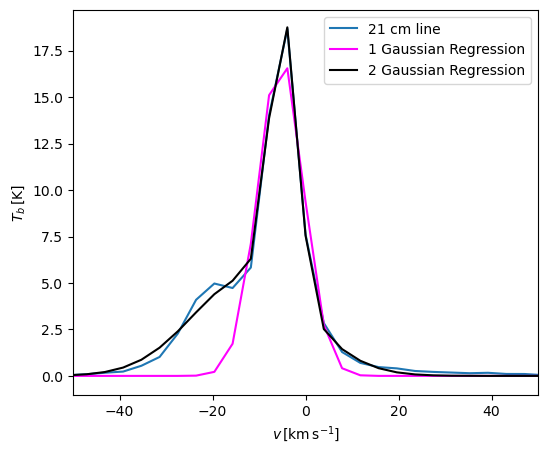

In [27]:
# Figure environment:

plt.figure(figsize=(6,5))

plt.plot(h1_vel, h1_int, label = "21 cm line")

# 1st attemp: Regression -> 1 Gaussian
plt.plot(h1_vel, h1_int_fit, color = "magenta", label = "1 Gaussian Regression")


# 2nd attemp: Regression -> 2 Gaussians
plt.plot(h1_vel, h1_int_fit2, color = "black", label = "2 Gaussian Regression")


plt.legend()

plt.xlabel(r"$v\,\rm [km\,s^{-1}]$")
plt.ylabel(r"$T_b\,\rm [K]$")

plt.xlim(-50, +50)

plt.show()

## Plot separately

The height of the two clouds is related with density. The higher the intensity, higher the density of the gas cloud.
The smaller one is more spread, since it has velocities on different ranges.

## C: Try with three gaussians

The green cloud has a smaller velocity dispersion, not much is happening inside the cloud or to the cloud. The red one has a higher velocity dispersion so the molecules are dispersed and the gas is undergoing something (higher temperature, gravitational pull, etc).

The LLM method does not consider the dispersion of the data itself. We have to use a better functional.